In [1]:
from plots import *
from PMs import *
from utils import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import pingouin as pg

import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

from sklearn.metrics import accuracy_score
from statistics import mode
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr

#from sklearn.model_selection import cross_val_score
pd.set_option("display.max_rows", 100, "display.max_columns", 100) 
np.set_printoptions(precision=2)


In [2]:
ds = pd.read_excel('data/MS_text_XRF_hydr_hyst.xlsx')

ds['EC_HP'] = logsdon(50e6, ds.field_realperm, ds.field_imperm)
#print(ds.describe())

#Clean datasets
#df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df = ds.dropna(subset=['Xlf_IP', 'Clay'])
df_xrf = ds.dropna(subset=['Xlf_IP', 'Fe', 'Clay', 'EC_HP', 'MS_field'])

# Assuming df is your DataFrame
median_humus = df['Humus'].median()
top_soil = df[df['Humus'] > median_humus]
sub_soil = df[df['Humus'] <= median_humus]


# Assuming df is your DataFrame
median_clay = df['Clay'].median()
print(median_clay)
clay_soil = df[df['Clay'] > median_clay]
sandy_soil = df[df['Clay'] <= median_clay]

df

12.61630630493164


,SAMPLE,NUMBER,Time,Duration,Depth,MS_field,Klf_IP,Klf_QP,Ph_F1,Time_F1,Date_F1,Mass,#_y,Rg_F3,Khf_IP,Khf_QP,Ph_F3,Time_F3,Date_F3,Xlf_IP,Xhf_IP,Kfd_abs,Kfd,Xfd_abs,SiO2,SiO2 Error,MgO,MgO Error,Al2O3,Al2O3 Error,Mo,Mo Error,Zr,Zr Error,Sr,Sr Error,U,U Error,Rb,Rb Error,Th,Th Error,Pb,Pb Error,Au,Au Error,Se,Se Error,As,As Error,...,P,P Error,Si,Si Error,Cl,Cl Error,Mg,Mg Error,Sc,Sc Error,Cs,Cs Error,Te,Te Error,copeky,horizon,Archaeology,Bulk_density,copeky_depth,Carbone,Humus,pH_eau,CEC,Granulom,Clay,Silt_fine,Silt_coarse,Silt,Sand_finr,Sand_coarse,Sand,Battance,CaCO,field_vwc,field_realperm,field_imperm,field_temp,EC1_5,Hcr,Hc,Mrs,Ms,Hcr_unc,Hc_unc,Mrs_unc,Ms_unc,Mmax,Area_loops,S*,EC_HP
0,HOEKE8,7.0,2022-04-11 16:36:00,360.55,28.0,0.001160,0.001265,3.180000e-05,1.44,14:17:38,06-04-2022,13.700,416.0,4.0,0.001204,-1.450000e-06,-0.07,15:54:01,06-04-2022,9.233577e-05,8.788321e-05,6.100000e-05,4.822134,4.452555e-06,721093.75,0.0,6214.25,0.0,127372.15,0.0,6.04,1.38,352.40,3.02,137.65,1.94,0.0,3.37,69.13,1.66,4.89,1.31,26.37,2.48,0.0,3.24,0.0,1.75,10.37,2.07,...,558.04,141.08,336959.69,1030.23,0.00,21.09,3743.53,1254.82,0.00,29.06,0.00,9.40,0.0,20.01,8.0,NaN,1,1.645529,28.0,14.05,2.810,8.29,13.855194,G22/0063,21.728016,13.207226,28.118608,41.325836,34.679619,2.266530,36.946148,0.562819,8.1,32.85,28.8,27.4,19.70,0.016980,249.550,123.538,0.000106,0.469917,247.888,112.017,0.469700,2.431580,6536.84,93.187000,0.079,0.043537
1,HOEKE2,2.0,2022-04-11 16:28:00,360.72,30.0,0.001160,0.000193,8.215000e-06,2.44,13:59:00,06-04-2022,14.390,422.0,3.0,0.000177,3.750000e-06,1.21,15:57:02,06-04-2022,1.341209e-05,1.231411e-05,1.580000e-05,8.186528,1.097985e-06,660746.69,0.0,0.00,0.0,113498.26,0.0,6.85,1.41,360.72,3.13,199.01,2.34,0.0,3.35,65.28,1.64,5.11,1.31,15.94,2.23,0.0,3.27,0.0,1.75,11.50,1.94,...,0.00,206.69,308760.13,1038.13,0.00,21.52,0.00,2558.96,0.00,38.40,0.00,9.69,0.0,20.63,2.0,NaN,1,1.689183,30.0,4.04,0.808,8.58,12.630222,G22/0064,25.549706,15.871787,31.743574,47.615360,26.618149,0.216785,26.834934,1.099872,13.9,25.75,27.4,24.4,19.90,0.014730,285.265,99.075,0.001589,0.009118,297.215,76.259,0.005140,0.171750,9397.49,1.301000,0.166,0.040364
2,HOEKE3,3.0,2022-04-11 16:44:00,360.03,55.0,0.000167,0.000097,7.588000e-06,4.45,14:15:25,06-04-2022,14.800,415.0,3.0,0.000093,8.223000e-07,0.51,15:53:29,06-04-2022,6.584459e-06,6.268243e-06,4.680000e-06,4.802463,3.162162e-07,773071.75,0.0,6519.06,0.0,115481.81,0.0,6.92,1.40,394.97,3.15,125.16,1.85,0.0,3.19,61.34,1.56,5.58,1.27,12.35,2.09,0.0,3.22,0.0,1.73,8.43,1.78,...,0.00,204.00,361248.47,1075.60,0.00,20.20,3927.15,1160.82,0.00,26.82,0.00,8.93,0.0,18.88,3.0,NaN,1,1.792090,55.0,3.06,0.612,8.52,7.937311,G22/0069,16.102394,10.322048,28.488852,38.810898,45.086704,0.000000,45.086704,1.354224,7.2,26.71,19.2,15.4,16.30,0.014700,258.689,68.993,0.000355,0.002942,274.262,48.107,0.001489,0.122840,9447.95,3.491480,0.121,0.027061
3,HOEKE47,11.0,2022-04-11 17:00:00,361.23,63.0,0.000165,0.000163,4.224000e-06,1.48,14:09:47,06-04-2022,13.840,413.0,3.0,0.000151,3.008000e-06,1.14,15:52:07,06-04-2022,1.181358e-05,1.090318e-05,1.260000e-05,7.706422,9.104046e-07,667377.88,0.0,4992.94,0.0,117029.09,0.0,5.20,1.39,337.41,3.05,189.65,2.30,0.0,3.48,69.67,1.70,6.59,1.35,13.35,2.18,0.0,3.37,0.0,1.82,10.86,1.89,...,0.00,206.17,311858.81,1025.95,0.00,21.39,3007.79,1321.62,48.01,24.63,0.00,9.77,0.0,20.78,47.0,NaN,1,1.551990,63.0,4.25,0.850,8.57,14.484537,G22/0065,28.995331,17.698448,30.501581,48.200027,22.759451,0.045188,22.804638,1.004134,13.8,39.09,28.8,26.8,19.30,0.014420,311.631,103.325,0.000970,0.004973,324.559,71.722,0.003925,0.181840,9437.00,1.052000,0.159,0.043170
4,HOEKE23,10.0,2022-04-11 16:52:00,361.42,80.0,0.000141,0.000091,6.116000e-06,3.83,14:25:28,06-04-2022,14.180,406.0,3.0,0.000087,1.023000e-06,0.67,15:48:53,06-04-2022,6.437941e-06,6.123413e-06,4.460000e-06,4.885530,3.145275e-07,723505.50,0.0,7262.30,0.0,99965.17,0.0,7.53,1.48,477.01,3.53,189.34,2.29,0.0,3.31,55.23,1.54,5.70,1.30,10.20,2.08,0.0,3.27,0.0,1.78,10.2

In [3]:

# Assuming df is your DataFrame and it has columns 'Klf_IP' and 'MS_field'

# Remove outliers for both columns
#filtered_df = remove_outliers(df, 'Klf_IP')
#filtered_df = remove_outliers(filtered_df, 'MS_field')

# Optionally, you can plot the filtered data
#import matplotlib.pyplot as plt

#plt.scatter(ds['Klf_IP'], ds['MS_field'])
#plt.xlabel('Klf_IP')
#plt.ylabel('MS_field')
#plt.title('Klf_IP vs MS_field (without outliers)')
#plt.show()

#filtered_df.describe()
#df = filtered_df

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


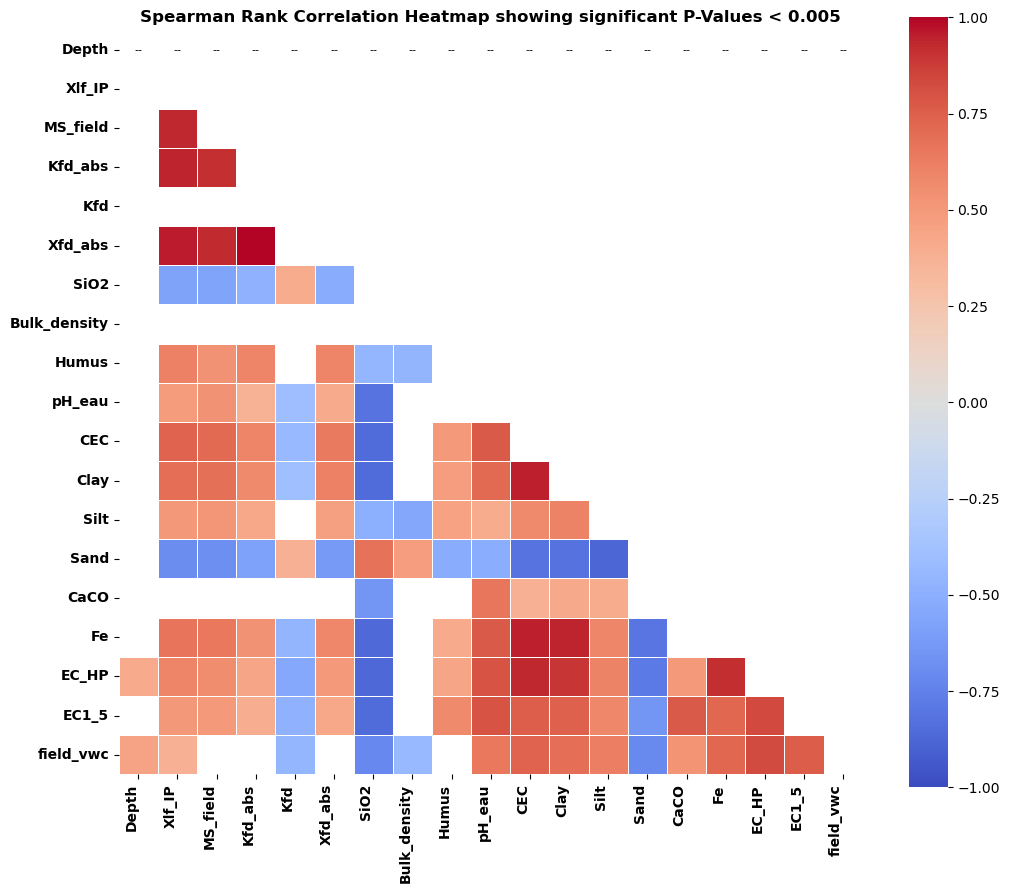

In [4]:
# Define the filtered features
filtered_features = ['Depth', 'Xlf_IP', 'MS_field', 'Kfd_abs', 'Kfd', 'Xfd_abs', 'SiO2', 'Bulk_density', 
                     'Humus', 'pH_eau', 'CEC', 'Clay', 'Silt', 'Sand', 'CaCO', 'Fe', 'EC_HP', 'EC1_5', 'field_vwc']

# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = df_xrf[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
corr_df = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)
p_value_df = pd.DataFrame(p_value, index=filtered_features, columns=filtered_features)

# Create a mask for significant p-values (e.g., p < 0.005)
p_value_mask = 0.005
significant_mask = p_value_df < p_value_mask

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Combine the masks
final_mask = mask | ~significant_mask

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, mask=final_mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, vmin=-1, vmax=1, annot_kws={"size": 8, "color": "black"})

# Adjust layout for better readability
plt.xticks(rotation=90, ha='right', fontsize=10, fontweight='bold')
plt.yticks(rotation=0, fontsize=10, fontweight='bold')
plt.title('Spearman Rank Correlation Heatmap showing significant P-Values < ' + str(p_value_mask), fontsize=12, fontweight='bold')

# Save the plot
folder_path = 'figures_output/'
filename = "Corr_Hysteresis.png"
plt.savefig(folder_path + filename)

# Show the plot
plt.show()

c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mendo\anaconda3_2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

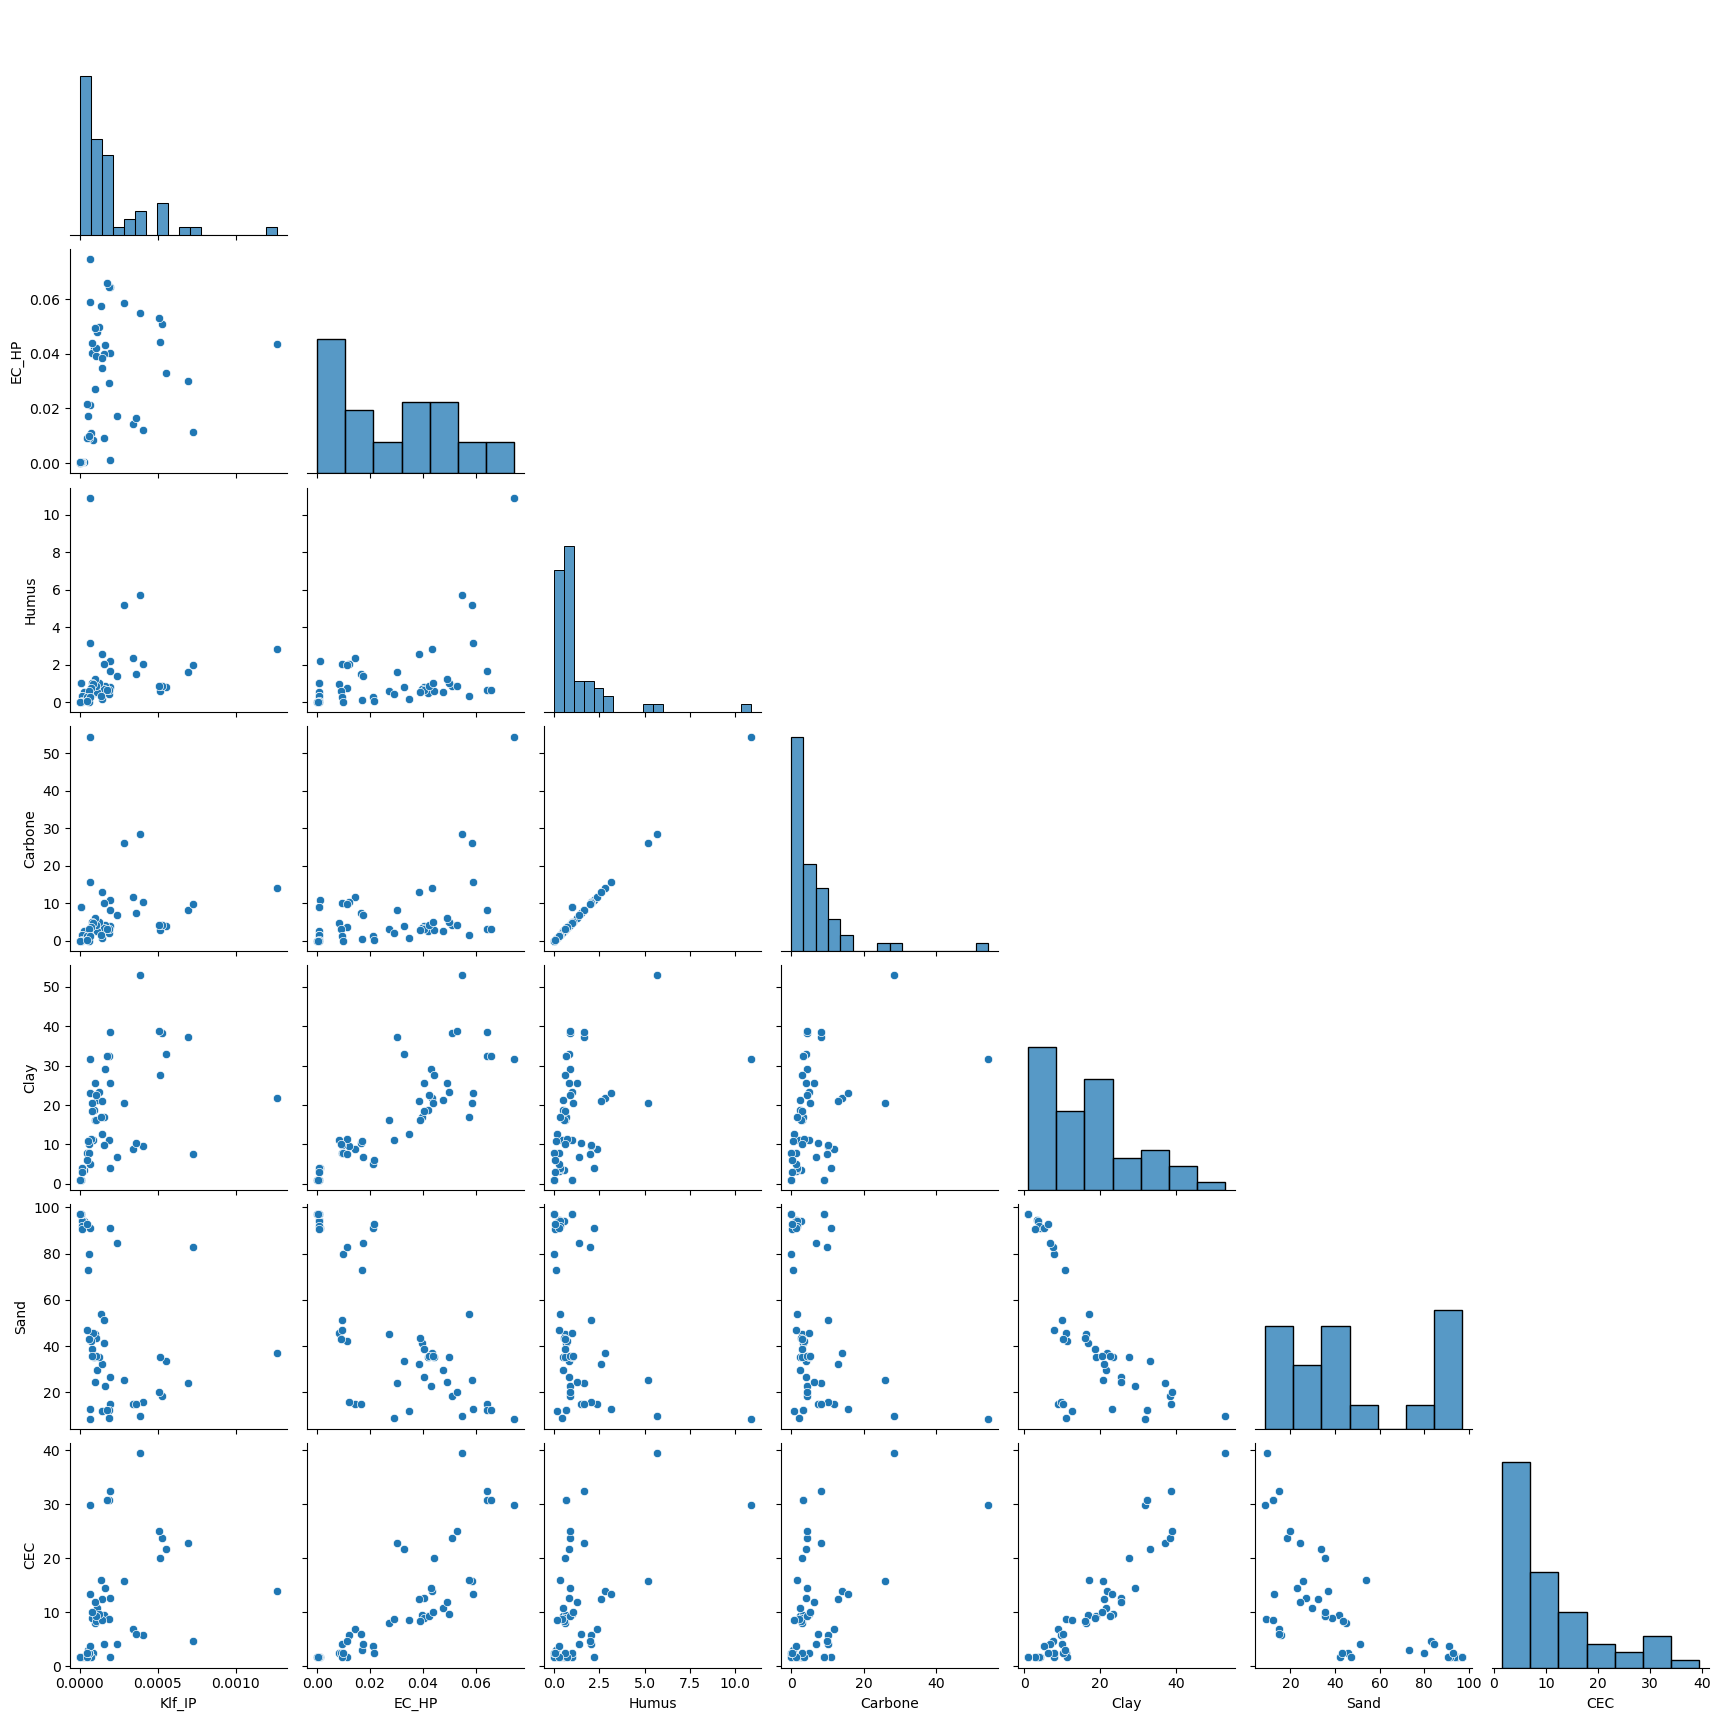

In [5]:
g = sns.pairplot(df.loc[:,['Klf_IP', 'EC_HP', 'Humus', 'Carbone', 'Clay', 'Sand', 'CEC']], 
                  diag_kws=dict(fill=True), corner=True)
plt.show()

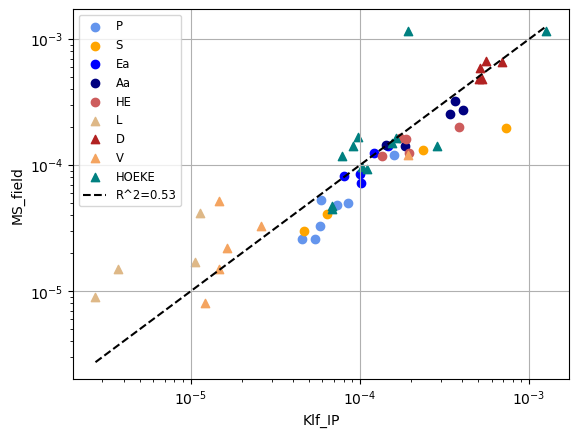

In [6]:
mapping = {
    # "AN": ("black", "o"),
    "P": ("cornflowerblue", "o"),
    "S": ("orange", "o"),
    "Ea": ("blue", "o"),
    "Aa": ("navy", "o"),
    "HE": ("indianred", "o"),
    "L": ("burlywood", "^"),
    "D": ("firebrick", "^"),
    "V": ("sandybrown", "^"),
    "HOEKE": ("teal", "^"),
#    "EHBH": ("seagreen", "^"),
}

plot_sing(df, 'Klf_IP', 'MS_field', mapping, log_scale=True, onexone_line=True)

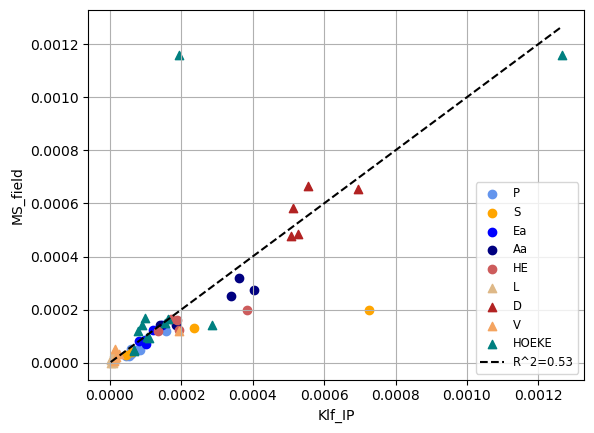

In [7]:
plot_sing(df, 'Klf_IP', 'MS_field', mapping, onexone_line=True)


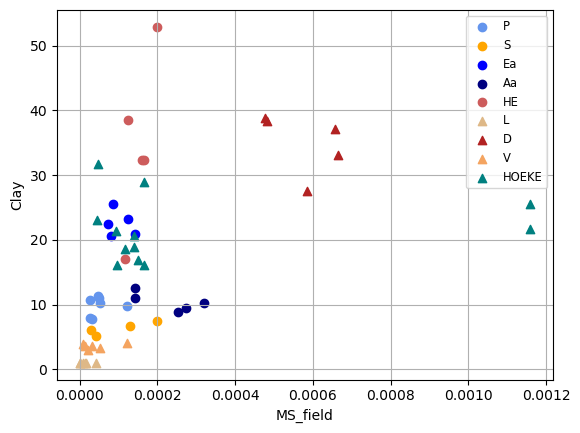

In [8]:
plot_sing(df, 'MS_field', 'Clay', mapping)

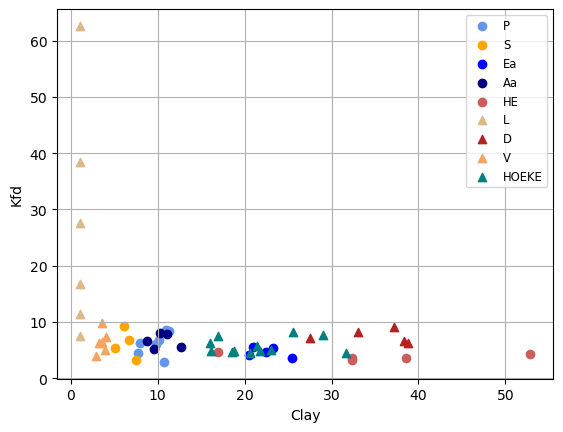

In [9]:
plot_sing(df_xrf, 'Clay', 'Kfd', mapping)

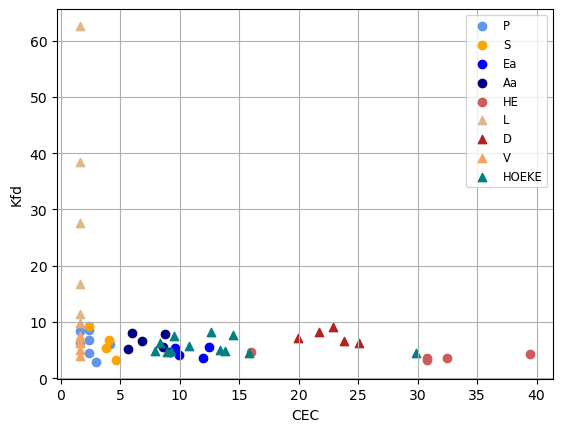

In [10]:
plot_sing(df, 'CEC', 'Kfd', mapping)

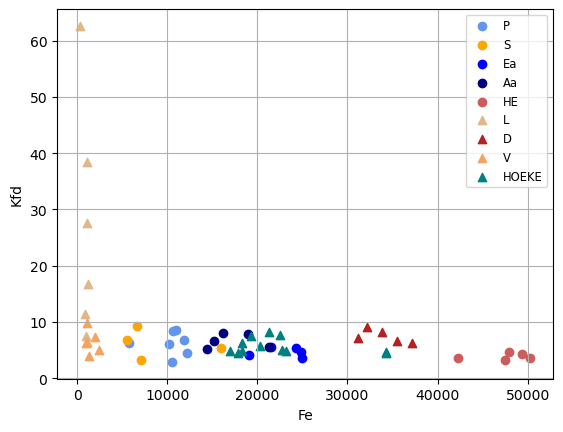

In [11]:
plot_sing(df, 'Fe', 'Kfd', mapping)

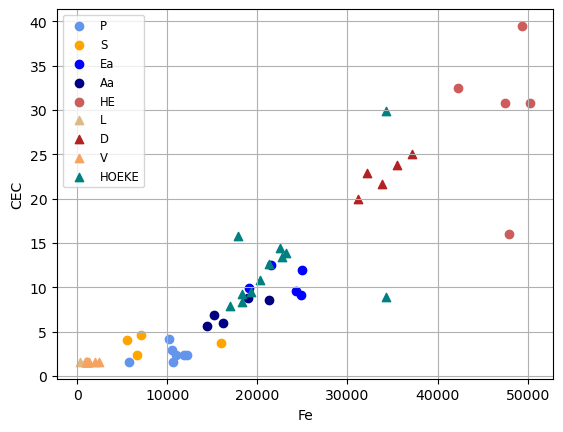

In [12]:
plot_sing(df, 'Fe', 'CEC', mapping)

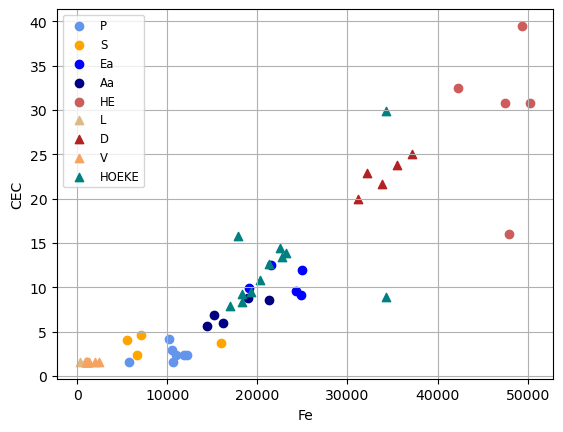

In [13]:
plot_sing(df_xrf, 'Fe', 'CEC', mapping)

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:185: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


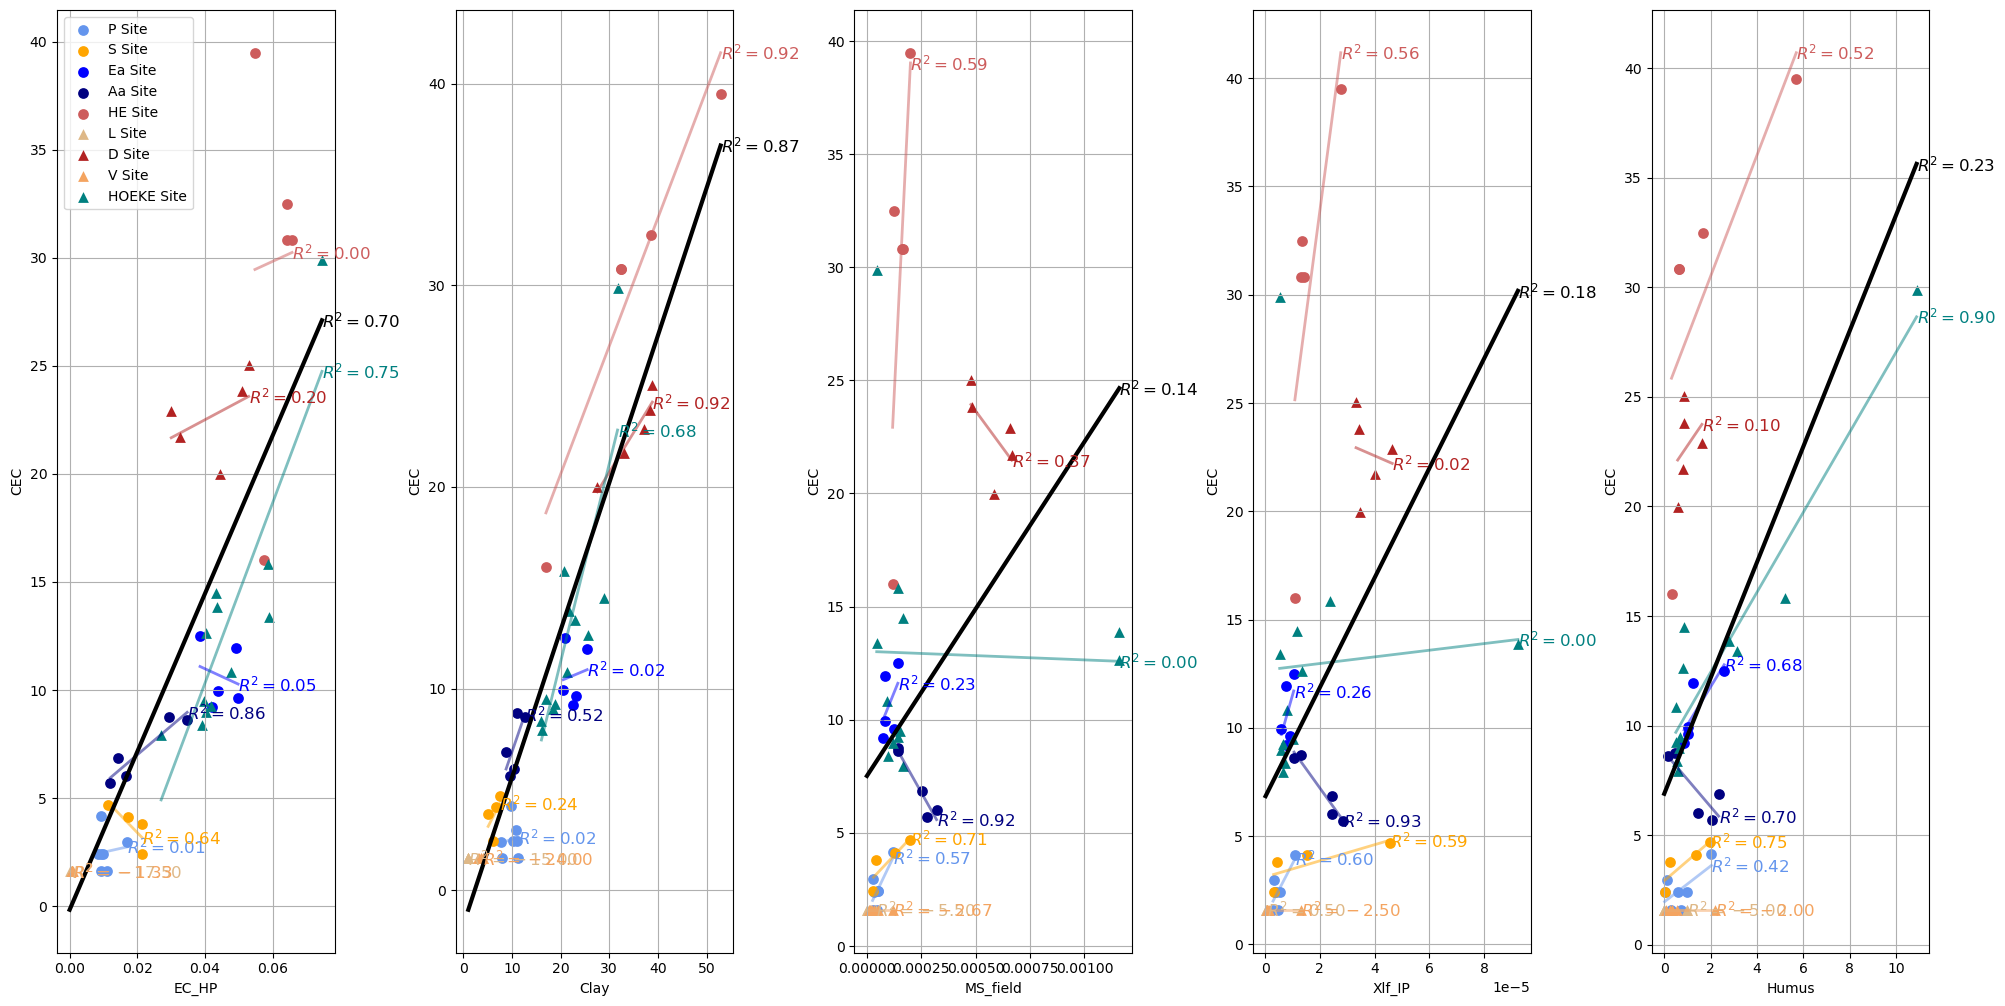

In [14]:
fig, axs = plt.subplots(1, 5, figsize=(20, 10))

# First row plots using df
# Plot scatter and regression lines for EC_HP vs CEC
plot_data1(axs[0], df_xrf, 'EC_HP', 'CEC', mapping, include_label=True)
axs[0].set_xlabel('EC_HP')
axs[0].set_ylabel('CEC')
axs[0].grid(True)

# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[1], df_xrf, 'Clay', 'CEC', mapping, include_label=False)
axs[1].set_xlabel('Clay')
axs[1].set_ylabel('CEC')
axs[1].grid(True)

# Plot scatter and regression lines for Fe vs CEC
plot_data1(axs[2], df_xrf, 'MS_field', 'CEC', mapping, include_label=False)
axs[2].set_xlabel('MS_field')
axs[2].set_ylabel('CEC')
axs[2].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[3], df_xrf, 'Xlf_IP', 'CEC', mapping, include_label=False)
axs[3].set_xlabel('Xlf_IP')
axs[3].set_ylabel('CEC')
axs[3].grid(True)

# Plot scatter and regression lines for Xlf_IP vs CEC
plot_data1(axs[4], df_xrf, 'Humus', 'CEC', mapping, include_label=False)
axs[4].set_xlabel('Humus')
axs[4].set_ylabel('CEC')
axs[4].grid(True)

plt.tight_layout(pad=.50)  # Reduced padding between subplots
plt.show()

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:185: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(filtered_df[x_col_name], filtered_df[y_col_name], 1)


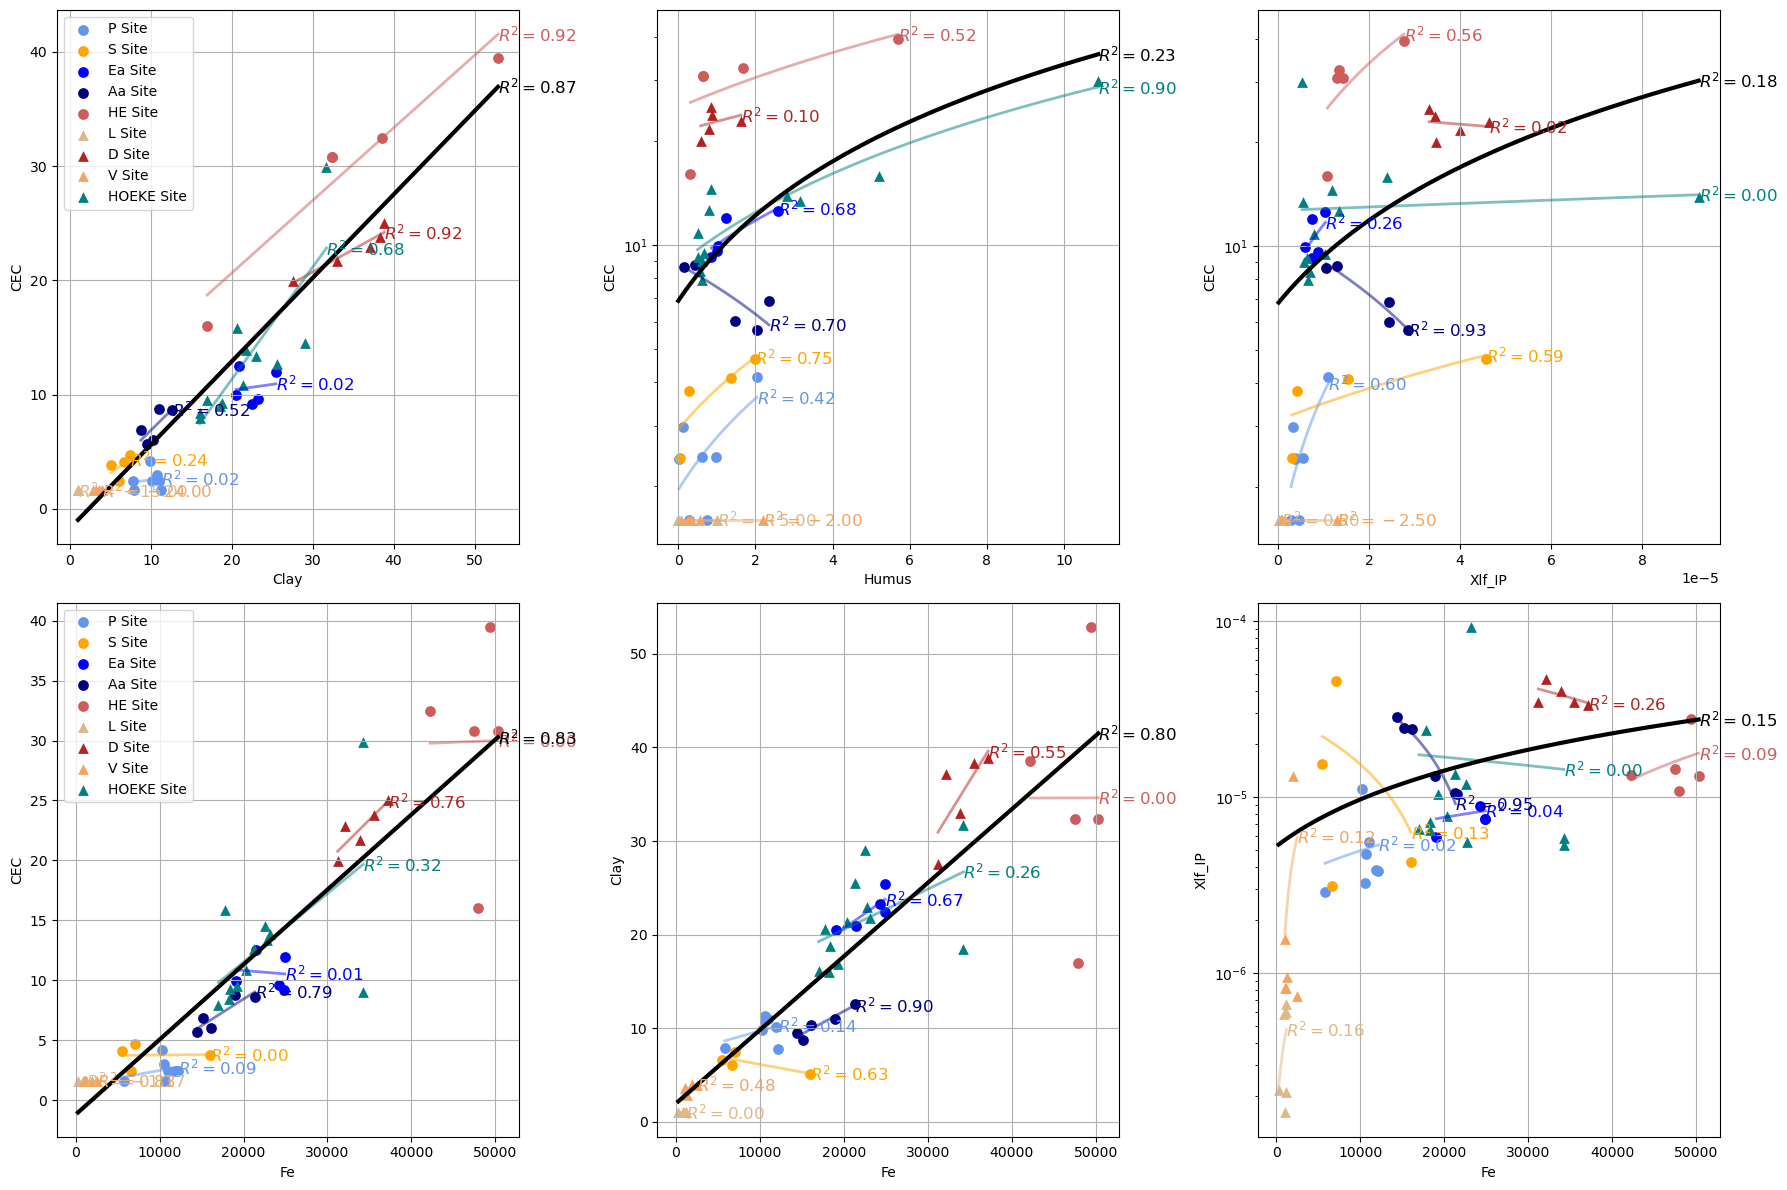

In [15]:
# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'
x_col_xlf_ip = 'Xlf_IP'
x_col_ec_hp = 'EC_HP'
x_col_fe = 'Fe'
x_col_humus = 'Humus'

fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# First row plots using df
# Plot scatter and regression lines for Clay vs CEC
plot_data1(axs[0, 0], df_xrf, x_col_clay, y_col_cec, mapping, include_label=True)
axs[0, 0].set_xlabel('Clay')
axs[0, 0].set_ylabel('CEC')
axs[0, 0].grid(True)

# Plot scatter and regression lines for Clay vs Xlf_IP
plot_data1(axs[0, 1], df_xrf, x_col_humus, y_col_cec, mapping, include_label=False)
axs[0, 1].set_xlabel('Humus')
axs[0, 1].set_ylabel('CEC')
axs[0, 1].grid(True)
axs[0, 1].set_yscale('log')

# Plot scatter and regression lines for CEC vs Xlf_IP
plot_data1(axs[0, 2], df_xrf, x_col_xlf_ip, y_col_cec, mapping, include_label=False)
axs[0, 2].set_ylabel('CEC')
axs[0, 2].set_xlabel('Xlf_IP')
axs[0, 2].grid(True)
axs[0, 2].set_yscale('log')

# Second row plots using dff
# Plot scatter and regression lines for Clay vs EC_HP
plot_data1(axs[1, 0], df_xrf, x_col_fe, y_col_cec, mapping, include_label=True)
axs[1, 0].set_xlabel('Fe')
axs[1, 0].set_ylabel('CEC')
axs[1, 0].grid(True)

# Plot scatter and regression lines for CEC vs EC_HP
plot_data1(axs[1, 1], df_xrf, x_col_fe, x_col_clay, mapping, include_label=False)
axs[1, 1].set_xlabel('Fe')
axs[1, 1].set_ylabel('Clay')
axs[1, 1].grid(True)

# Plot scatter and regression lines for Xlf_IP vs EC_HP
plot_data1(axs[1, 2], df_xrf, x_col_fe, x_col_xlf_ip, mapping, include_label=False)
axs[1, 2].set_ylabel('Xlf_IP')
axs[1, 2].set_xlabel('Fe')
axs[1, 2].grid(True)
axs[1, 2].set_yscale('log')

plt.tight_layout()
plt.show()

c:\Users\mendo\OneDrive - UGent\Documentos\PhD\Magnetics\Magnetism_code\plots.py:234: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(df[x_col_name][mask], df[y_col_name][mask], 1)


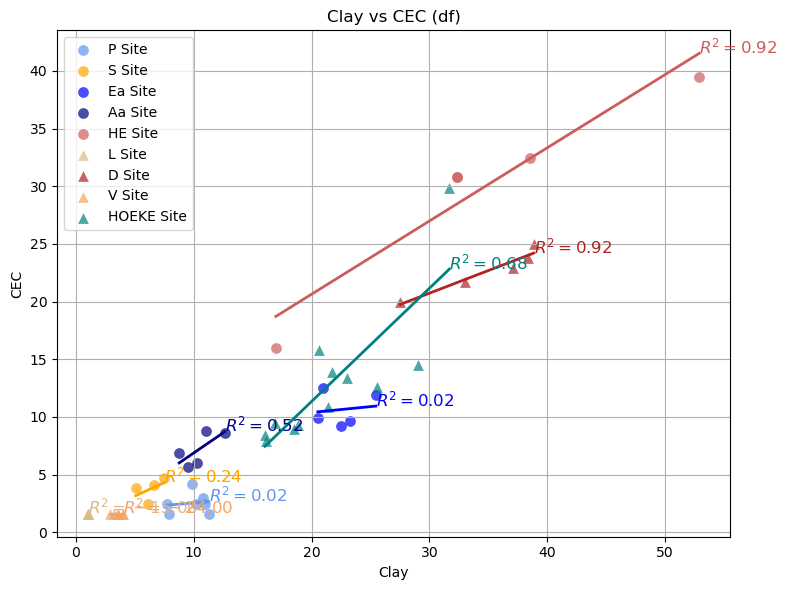

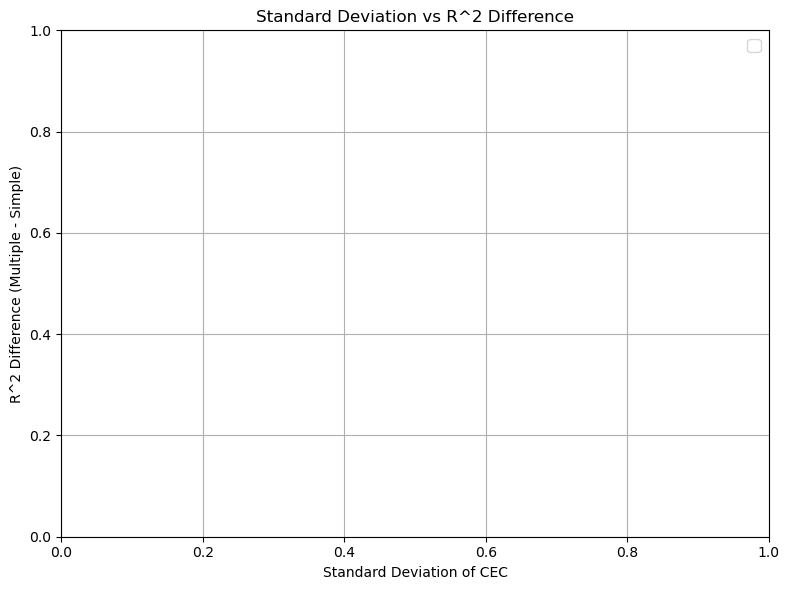

In [16]:
# Extract columns for plotting
x_col_clay = 'Clay'
y_col_cec = 'CEC'

fig, ax = plt.subplots(figsize=(8, 6))

# Plot scatter and regression lines for Clay vs CEC
std_devs, r2_diffs = plot_data2(ax, df, x_col_clay, y_col_cec, mapping, include_label=True)
ax.set_xlabel('Clay')
ax.set_ylabel('CEC')
ax.set_title('Clay vs CEC (df)')
ax.grid(True)

plt.tight_layout()
plt.show()

# Plot standard deviation versus R^2 difference
fig, ax2 = plt.subplots(figsize=(8, 6))
for start_str, (color, marker) in mapping.items():
    for std, r2_diff in zip(std_devs, r2_diffs):
        if start_str in df['SAMPLE'].unique():
            label = f"{start_str} Site" if True else None
            ax2.scatter(std, r2_diff, color=color, s=100, label=label)
            ax2.text(std, r2_diff, start_str, fontsize=12, color=color)

ax2.set_xlabel('Standard Deviation of CEC')
ax2.set_ylabel('R^2 Difference (Multiple - Simple)')
ax2.set_title('Standard Deviation vs R^2 Difference')
ax2.grid(True)

# Add legend
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels, fontsize=12)

plt.tight_layout()
plt.show()

In [17]:
#create_and_save_plots2(df_xrf, 'CEC', 'Xlf_IP', 'Clay', mapping)

In [18]:
# Example usage
#create_and_save_plots('Klf_IP', 'Clay', 'CEC')
#create_and_save_plots('Kfd_abs', 'Clay', 'CEC')
#create_and_save_plots('Xlf_IP', 'Clay', 'CEC')

## Linear implementation to predict CEC 
## No train-test


In [19]:
results_r2 = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])
results_rmse = pd.DataFrame(columns=['Clay_Klf_IP', 'Clay_Kfd'])

In [20]:
# Define feature sets for regressions
#feature_sets_1 = [('Clay',), ('MS_field',), ('Clay', 'Sand'), ('Clay', 'Klf_IP'), ('Clay', 'MS_field'), ('Clay', 'Humus')]

#feature_sets_1 = [('Clay',), ('Humus',), ('MS_field',), ('EC1_5',), ('Humus', 'Khf_IP'), ('Clay', 'Humus'), #['Clay', 'pH_eau'], ('Clay', 'Khf_IP'), 
#    ('Clay', 'MS_field'), ('Clay', 'Humus', 'Khf_IP'), ('Clay', 'Sand', 'Humus')]


target_1 = 'CEC'
#feature_sets_2 = [('Clay',), ('Clay', 'CEC'), ('Clay', 'Sand'), ('Clay', 'Humus')]
#target_2 = 'Klf_IP'

# Define your df, feature_sets_1, and feature_sets_2 as before

# Find the best regressor and its features for each target
##best_reg_1, best_features_1 = perform_regression_and_select_best(feature_sets_1, target_1, df)
#best_reg_2, best_features_2 = perform_regression_and_select_best(feature_sets_2, target_2, df)

# Generate meshgrids and Z values for the best regressor of each set
##X1, Y1, Z1 = generate_meshgrid_and_Z(best_reg_1, df, best_features_1)
#X2, Y2, Z2 = generate_meshgrid_and_Z(best_reg_2, df, best_features_2)

# Interactive plots
##def interactive_plot_1(elev=30, azim=30):
##    plot_3d(df, best_features_1[0], best_features_1[1], target_1, X1, Y1, Z1, elev, azim)

#def interactive_plot_2(elev=30, azim=30):
#    plot_3d(df, best_features_2[0], best_features_2[1], target_2, X2, Y2, Z2, elev, azim)

# Display interactive widgets
##display(widgets.interactive(interactive_plot_1, elev=(0, 90, 2), azim=(0, 360, 2)))
#display(widgets.interactive(interactive_plot_2, elev=(0, 90, 2), azim=(0, 360, 2)))
# Here we implemented linear functions to predict soil CEC based on different features. The model development fits the entire dataset.
# With these trhee conditions, adding soil susceptibility to clay is the optimal for CEC prediction.
# Further analysis follows the same problem for non-linear modelling with split of train and test datasets

## CEC prediction with Train-Test for all samples

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.862 0.892 3.319 3.203 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.035 0.244 8.542 8.487 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.231 0.33 8.155 7.885 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.103 0.351 9.08 7.73 ['Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.061 0.0 9.405 9.68 ['Kfd']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.819 0.839 4.159 3.768 ['Fe']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.01 0.131 8.9 9.124 ['EC1_5']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.672 0.744 5.002 4.96 ['EC_HP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.851 0.89

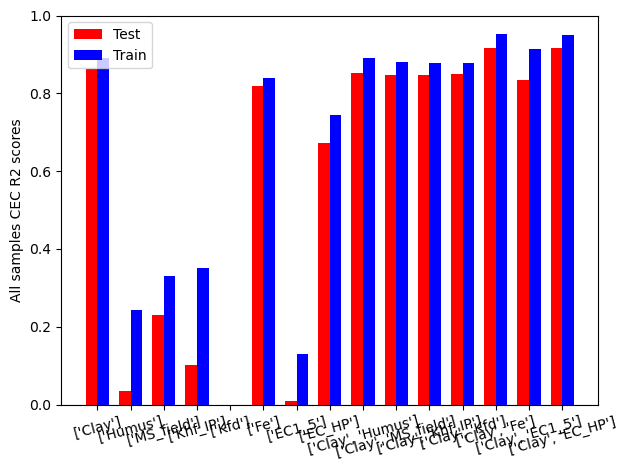

In [21]:
feature_sets_CEC = [
    ['Clay'],
#    ['Sand'],
    ['Humus'],
    ['MS_field'],
    ['Khf_IP'],
    ['Kfd'],
    ['Fe'],
    ['EC1_5'],
    ['EC_HP'],
    ['Clay', 'Humus'],
    ['Clay', 'MS_field'],
#    ['Sand', 'MS_field'],
    ['Clay', 'Khf_IP'],
    ['Clay', 'Kfd'],
    ['Clay', 'Fe'],
    ['Clay', 'EC1_5'],
    ['Clay', 'EC_HP'],
]

df_CEC = df['CEC']

test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(df, feature_set, df_CEC, iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    best_n_.append(best_n)
    test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)

bars_plot(feature_sets_CEC, test_errors_summary, train_errors_summary, 'All samples CEC')

model.coef_ [ 0.00e+00  3.23e-01 -4.35e-05 -1.51e-02  2.96e-05 -3.81e-09]
model.intercept_ 0.6800137247561544


c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



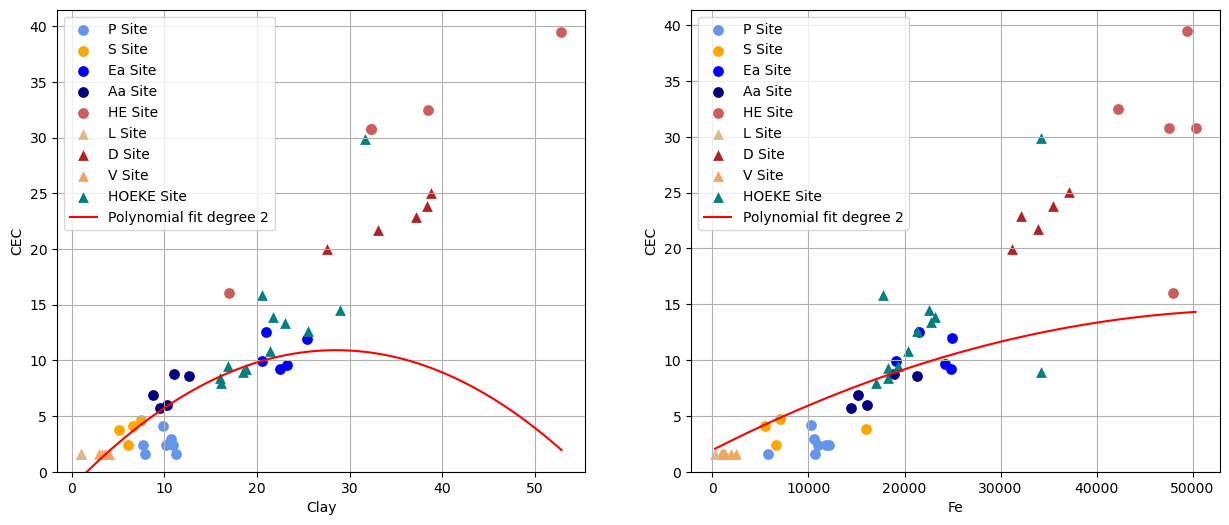

In [22]:
best_feat_ind = test_errors_summary.index(max(test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]
fit_and_plot(df, best_feat, 'CEC', best_feat_n, mapping)

# CEC prediction with Train and Test for Sandy

In [23]:
# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = sandy_soil[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
correlation_matrix = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)

print("Correlation Matrix:\n", correlation_matrix)

# Multiple regression
X = sm.add_constant(sandy_soil[['MS_field', 'Clay']])

# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

Correlation Matrix:
                  Depth    Xlf_IP  MS_field   Kfd_abs       Kfd   Xfd_abs  \
Depth         1.000000 -0.210353 -0.345759 -0.301561 -0.143248 -0.278554   
Xlf_IP       -0.210353  1.000000  0.905655  0.890531 -0.424193  0.899288   
MS_field     -0.345759  0.905655  1.000000  0.886211 -0.295769  0.888676   
Kfd_abs      -0.301561  0.890531  0.886211  1.000000 -0.050903  0.995074   
Kfd          -0.143248 -0.424193 -0.295769 -0.050903  1.000000 -0.055829   
Xfd_abs      -0.278554  0.899288  0.888676  0.995074 -0.055829  1.000000   
SiO2         -0.087373 -0.737274 -0.620841 -0.632731  0.376574 -0.649699   
Bulk_density  0.411861 -0.455180 -0.602027 -0.538388 -0.113863 -0.536746   
Humus        -0.697710  0.717282  0.734367  0.748254 -0.103330  0.738661   
pH_eau       -0.037848  0.421072  0.312099  0.367991 -0.243677  0.363041   
CEC           0.021369  0.813703  0.777528  0.749355 -0.363563  0.766905   
Clay          0.257743  0.764205  0.666626  0.623684 -0.371515  0.6

c:\Users\mendo\anaconda3_2\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning:

invalid value encountered in divide

c:\Users\mendo\anaconda3_2\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning:

invalid value encountered in divide



best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.322 0.424 1.785 1.599 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.004 0.142 2.235 1.9 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.55 0.647 1.485 1.236 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.416 0.598 1.666 1.323 ['Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 -0.073 0.092 2.329 2.01 ['Kfd']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.678 0.785 1.14 0.981 ['Fe']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.301 0.438 1.851 1.576 ['EC1_5']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.623 0.654 1.325 1.203 ['EC_HP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.319

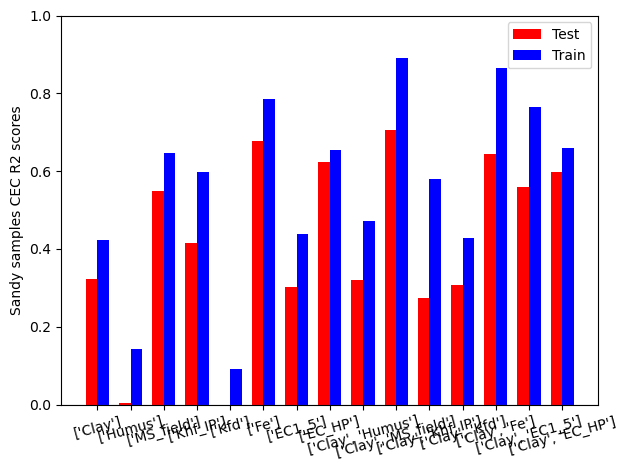

best_feat_ind, best_feat, best_feat_n 9 ['Clay', 'MS_field'] 2


In [24]:
sandy_test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(sandy_soil, feature_set, sandy_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    sandy_test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)
    best_n_.append(best_n)

best_feat_ind = sandy_test_errors_summary.index(max(sandy_test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]

bars_plot(feature_sets_CEC, sandy_test_errors_summary, train_errors_summary, 'Sandy samples CEC')
print('best_feat_ind, best_feat, best_feat_n', best_feat_ind, best_feat, best_feat_n)

model.coef_ [ 0.00e+00  8.69e-02 -6.77e+03 -2.67e-02  7.95e+03 -1.67e+08]
model.intercept_ 1.5245652696226837


c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



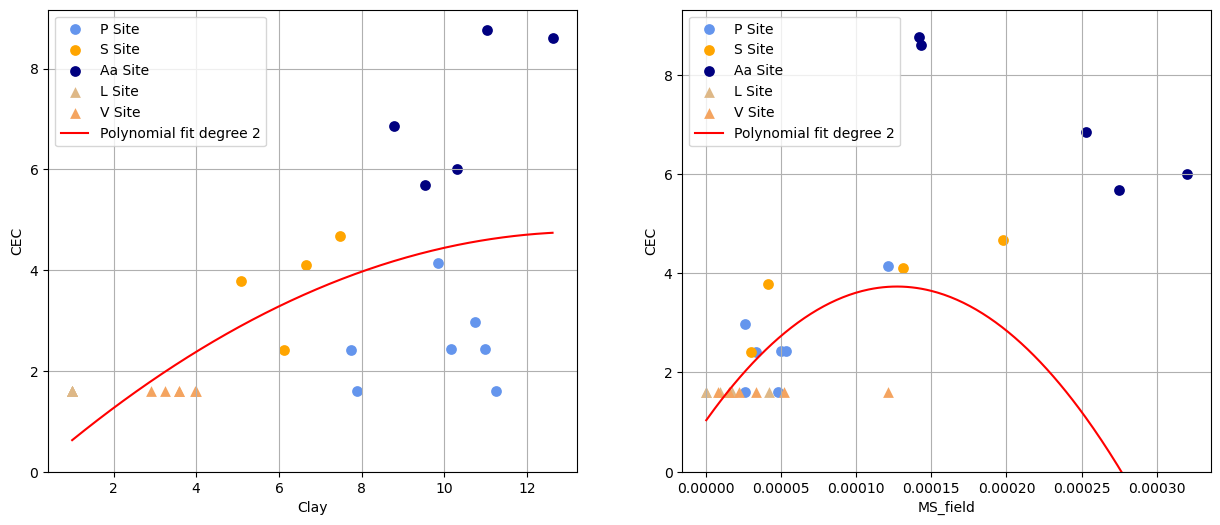

In [25]:
fit_and_plot(sandy_soil, best_feat, 'CEC', best_feat_n, mapping)

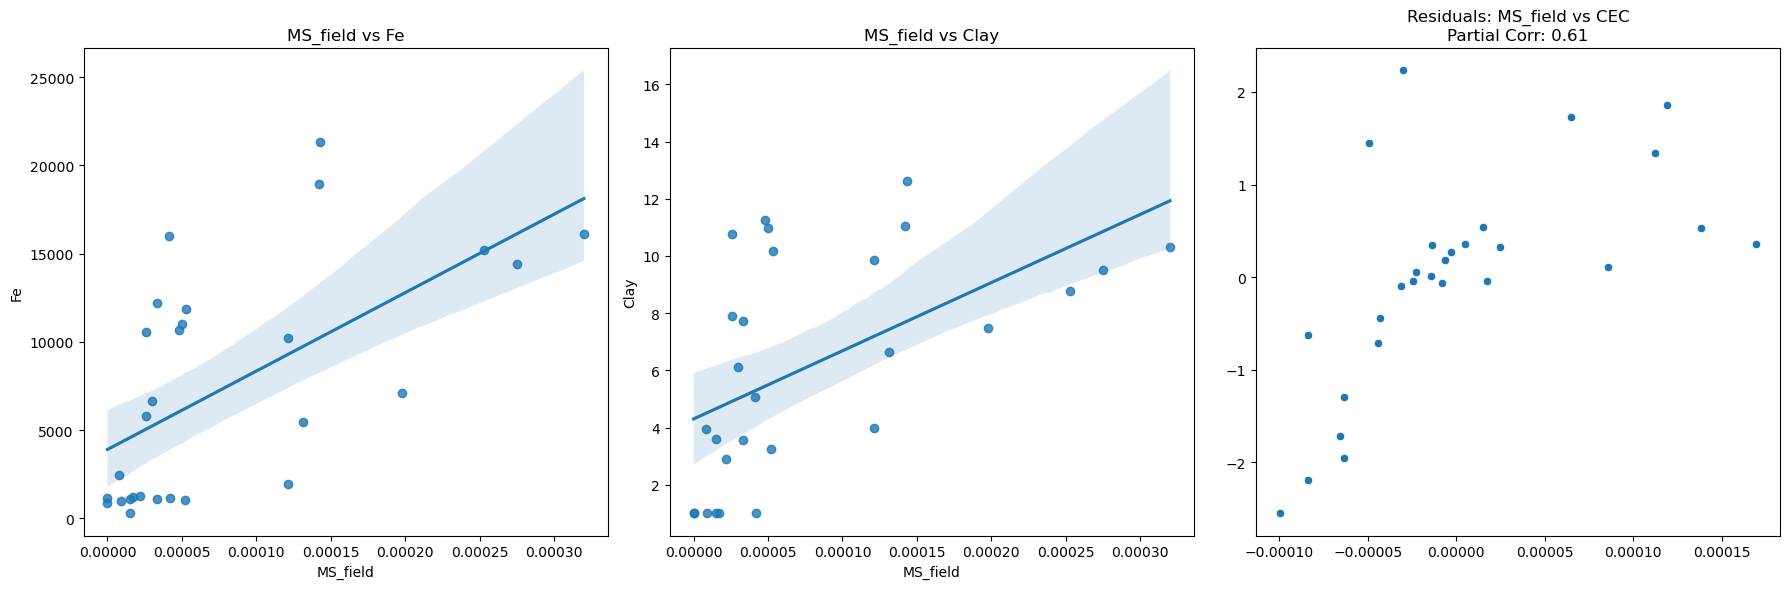

0.6100783738560328

In [26]:
#partial_correlation(sandy_soil, 'MS_field', 'CEC', 'Clay')
#artial_correlation(sandy_soil, 'MS_field', 'CEC', 'Fe')

partial_correlation(sandy_soil, 'MS_field', 'CEC', ['Fe', 'Clay'])

# CEC prediction with Train and Test for Clayey

Correlation Matrix:
                  Depth    Xlf_IP  MS_field   Kfd_abs       Kfd   Xfd_abs  \
Depth         1.000000 -0.220763 -0.344385 -0.197708  0.106870 -0.207634   
Xlf_IP       -0.220763  1.000000  0.831526  0.914618  0.324786  0.942002   
MS_field     -0.344385  0.831526  1.000000  0.840721  0.496411  0.857798   
Kfd_abs      -0.197708  0.914618  0.840721  1.000000  0.601497  0.979075   
Kfd           0.106870  0.324786  0.496411  0.601497  1.000000  0.553114   
Xfd_abs      -0.207634  0.942002  0.857798  0.979075  0.553114  1.000000   
SiO2         -0.223511  0.087912  0.175653  0.055903 -0.057387  0.015873   
Bulk_density -0.169797  0.421615  0.611519  0.541399  0.642650  0.502213   
Humus        -0.113012  0.127328 -0.057907  0.099465 -0.219237  0.095573   
pH_eau       -0.213357 -0.314808 -0.173461 -0.288233 -0.012249 -0.273160   
CEC           0.034814  0.601130  0.352123  0.385274 -0.177378  0.458861   
Clay         -0.065353  0.576095  0.402842  0.420409  0.010075  0.4

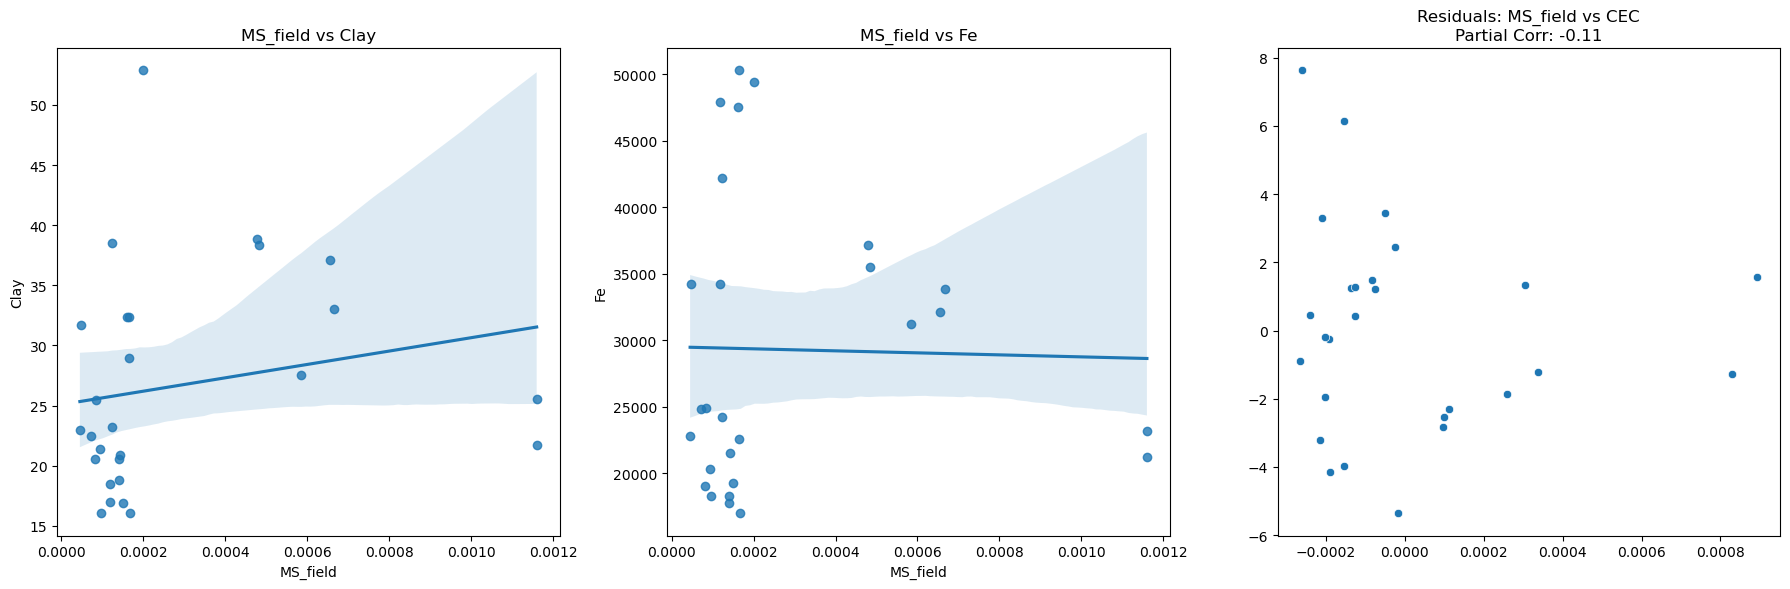

                            OLS Regression Results                            
Dep. Variable:                    CEC   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     46.64
Date:                Fri, 02 Aug 2024   Prob (F-statistic):           5.39e-09
Time:                        19:57:48   Log-Likelihood:                -75.673
No. Observations:                  27   AIC:                             157.3
Df Residuals:                      24   BIC:                             161.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8264      2.605     -2.237      0.0

In [27]:
# Drop rows with NaN values in the filtered features to handle NaNs
df_filtered = clay_soil[filtered_features].dropna()

# Calculate the Spearman rank correlation coefficients and p-values
corr, p_value = spearmanr(df_filtered, nan_policy='omit')

# Convert to DataFrame for easier plotting
correlation_matrix = pd.DataFrame(corr, index=filtered_features, columns=filtered_features)

print("Correlation Matrix:\n", correlation_matrix)

#partial_correlation(clay_soil, 'MS_field', 'CEC', 'Clay')
#partial_correlation(clay_soil, 'MS_field', 'CEC', 'Fe')

partial_correlation(clay_soil, 'MS_field', 'CEC', ['Clay', 'Fe'])
# Multiple regression
X = sm.add_constant(clay_soil[['MS_field', 'Clay']])
model = sm.OLS(clay_soil['CEC'], X).fit()
print(model.summary())

# Check VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.691 0.802 4.41 4.033 ['Clay']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.104 0.0 8.881 8.997 ['Humus']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 -0.082 0.153 8.398 8.277 ['MS_field']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.104 0.0 8.881 8.997 ['Khf_IP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 2 0.019 0.229 8.02 7.788 ['Kfd']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.571 0.69 5.658 4.754 ['Fe']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 0 -0.104 0.0 8.881 8.997 ['EC1_5']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.124 0.36 6.919 7.271 ['EC_HP']
best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set: 1 0.684 0

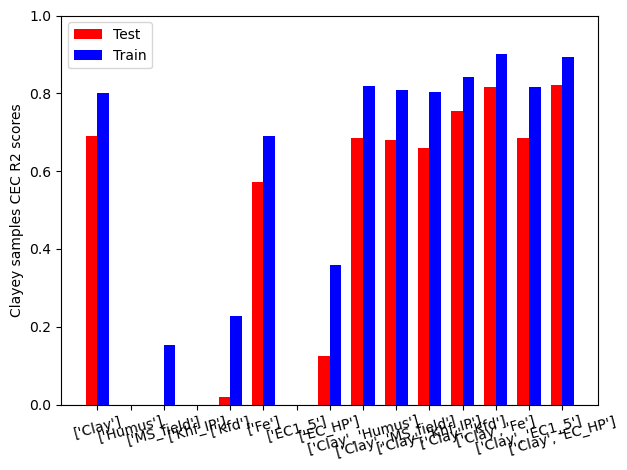

best_feat_ind, best_feat, best_feat_n 12 ['Clay', 'Fe'] 1
model.coef_ [0.00e+00 5.99e-01 3.58e-04]
model.intercept_ -9.008533419773478


c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

c:\Users\mendo\anaconda3_2\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



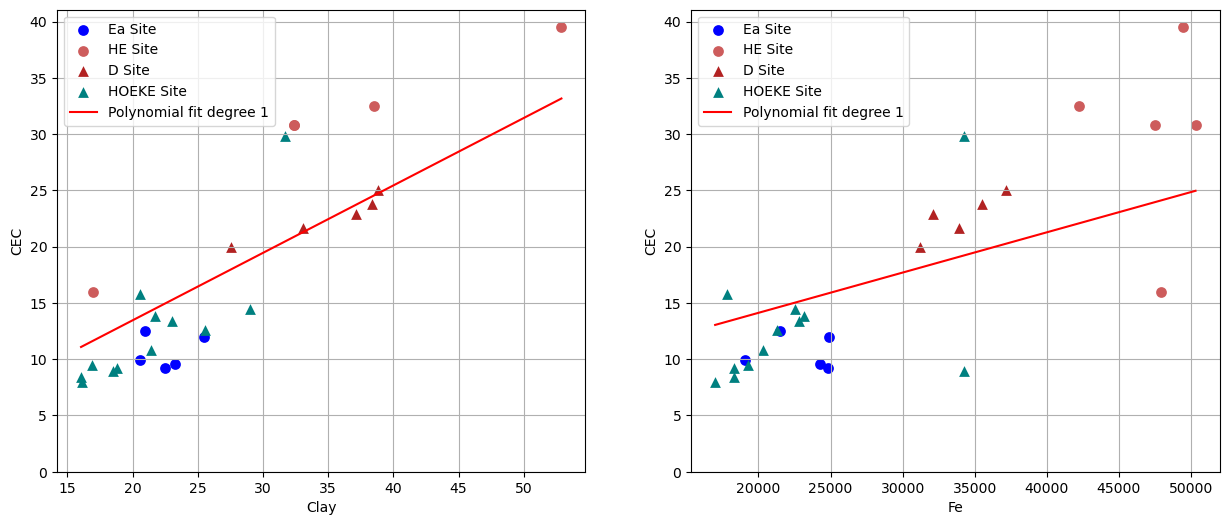

In [28]:
clay_test_errors_summary = []
train_errors_summary = []
best_n_ = []

for feature_set in feature_sets_CEC:
    
    best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol = stochastic_poly(clay_soil, feature_set, clay_soil['CEC'], iters=100)
    print('best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set:', best_n, R2_test_pol, R2_train_pol, RMSE_test_pol, RMSE_train_pol, feature_set)
    clay_test_errors_summary.append(R2_test_pol)
    train_errors_summary.append(R2_train_pol)
    best_n_.append(best_n)

bars_plot(feature_sets_CEC, clay_test_errors_summary, train_errors_summary, 'Clayey samples CEC')

best_feat_ind = test_errors_summary.index(max(test_errors_summary))
best_feat = feature_sets_CEC[best_feat_ind]
best_feat_n = best_n_[best_feat_ind]
print('best_feat_ind, best_feat, best_feat_n', best_feat_ind, best_feat, best_feat_n)

fit_and_plot(clay_soil, best_feat, 'CEC', best_feat_n, mapping)

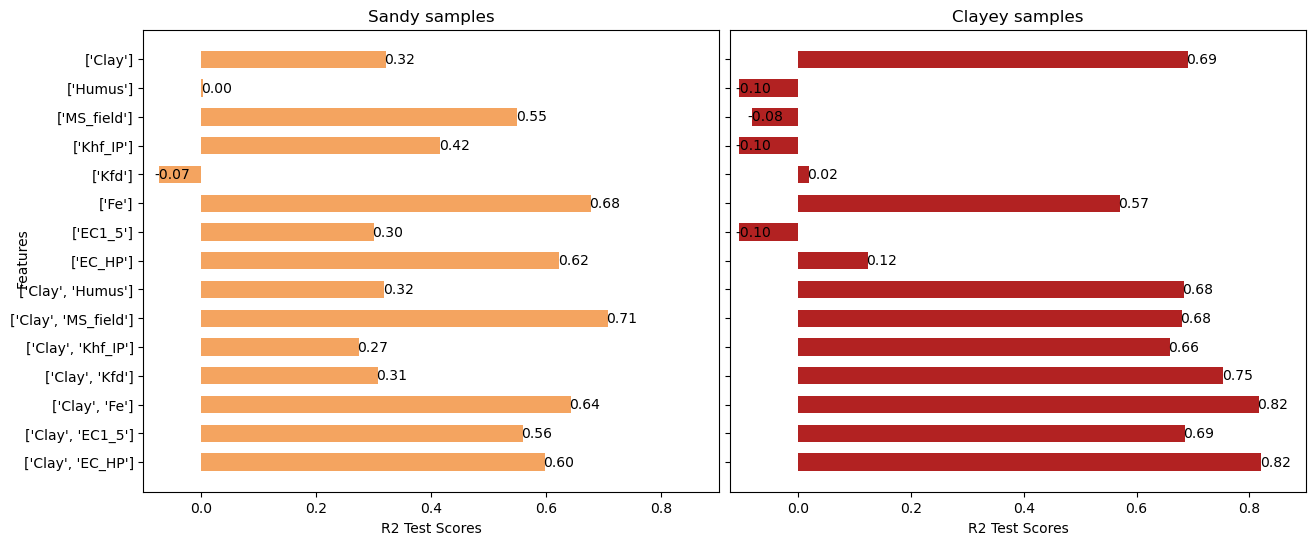

In [29]:
# Reverse the order of the feature sets and their corresponding error summaries
feature_sets_CEC = feature_sets_CEC[::-1]
sandy_test_errors_summary = sandy_test_errors_summary[::-1]
clay_test_errors_summary = clay_test_errors_summary[::-1]

# Create a horizontal bar plot with two separate columns
y = np.arange(len(feature_sets_CEC))  # the label locations
height = 0.6  # the height of the bars

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), sharey=True)
fig.subplots_adjust(wspace=0.02)  # Adjust the space between the subplots

# Plot for sandy soil
rects1 = ax1.barh(y, sandy_test_errors_summary, height, color='sandybrown')
ax1.set_xlabel('R2 Test Scores')
ax1.set_title('Sandy samples')
ax1.set_yticks(y)
ax1.set_yticklabels(feature_sets_CEC)
ax1.set_xlim(-0.1, 0.9)

# Plot for clayey soil
rects2 = ax2.barh(y, clay_test_errors_summary, height, color='firebrick')
ax2.set_xlabel('R2 Test Scores')
ax2.set_title('Clayey samples')
ax2.set_yticks(y)
ax2.set_yticklabels(feature_sets_CEC)
ax2.set_xlim(-0.12, 0.9)

# Function to add labels on bars
def add_labels(rects, ax):
    for rect in rects:
        width = rect.get_width()
        ax.annotate(f'{width:.2f}',
                    xy=(width, rect.get_y() + rect.get_height() / 2),
                    xytext=(10, 0),  # 10 points horizontal offset
                    textcoords="offset points",
                    ha='center', va='center')

add_labels(rects1, ax1)
add_labels(rects2, ax2)

# Add a common y-axis label
fig.text(0.04, 0.5, 'Features', va='center', rotation='vertical')
plt.savefig('figures_output/barplot.png', dpi=300)
plt.show()

In [30]:
df['Hrel'] = df.Hcr/df.Hc
df['Mrel'] = df.Mrs/df.Ms
print(len(df.Mrel))
df = df[df.Hc > 0.0]
df = df[df.Hcr > 0.0]
print(len(df.Mrel))


55
44


C:\Users\mendo\AppData\Local\Temp\ipykernel_64100\1902947521.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mendo\AppData\Local\Temp\ipykernel_64100\1902947521.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



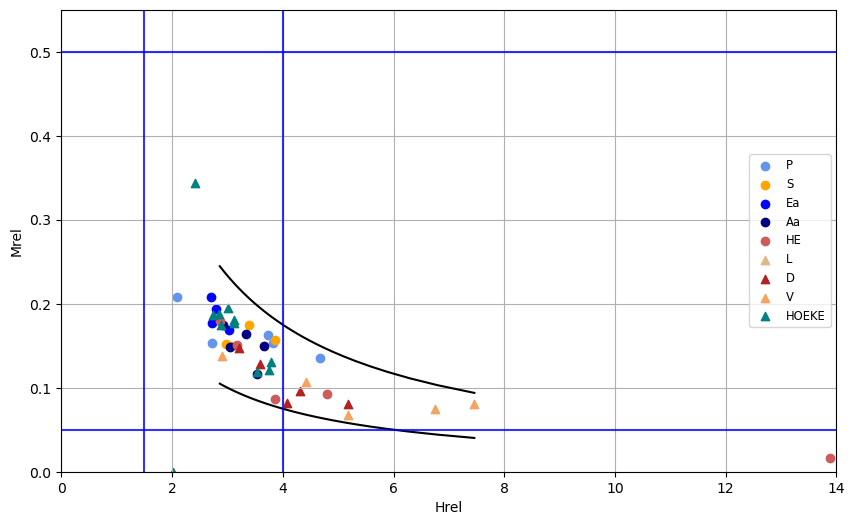

In [31]:
def plot_day(df, var1, var2, mapping, onexone_line=False, log_scale=False):
    plt.figure(figsize=(10, 6))
    for start_str, (color, marker) in mapping.items():
        mask = df['SAMPLE'].str.startswith(start_str)
        filtered_df = df[mask]
        plt.scatter(filtered_df[var1], filtered_df[var2], color=color, marker=marker, label=start_str)
        plt.grid(True)

    r2 = r2_score(df[var1], df[var2])

    # Adding a 1:1 line
    if onexone_line:
        x = np.linspace(min(df[var1]), max(df[var1]), 100)
        plt.plot(x, x, color='black', linestyle='--', label=f'R^2={r2:.2f}' )

    # Setting both axes to logarithmic scale
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')    
        
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend(fontsize='small')  # Adjusting the font size of the legend

    sHc  = np.linspace(min(df['Hc']), max(df['Hc']), 100)
    sHcr = np.linspace(min(df['Hcr']), max(df['Hcr']), 100)

    p01 = 0.1 / (sHcr / sHc)
    p03 = 0.3 / (sHcr / sHc)
    p025 = 0.25 / (sHcr / sHc)
    p07 = 0.7 / (sHcr / sHc)

    #plt.plot(sHcr / sHc, p01, c="black", label="p01")
    plt.plot(sHcr / sHc, p03, c="black", label="p03")
    plt.plot(sHcr / sHc, p07, c="black", label="p07")

    plt.axvline(x=1.5, alpha=0.8, color='b')
    plt.axvline(x=4, alpha=0.8, color='b')
    plt.axhline(y=0.5, alpha=0.8, color='b')
    plt.axhline(y=0.05, alpha=0.8, color='b')

    #plt.axvline(x=5, color='deepskyblue')
    #plt.axhline(y=0.02, color='deepskyblue')
    plt.xlim(0, 14)
    plt.ylim(0, 0.55)

    folder_path = 'figures_output/'
    filename = var1 + '_' + var2 + '_' + str(log_scale) + ".png"
    plt.savefig(folder_path + filename)
    plt.show()
    
plot_day(df, 'Hrel', 'Mrel', mapping)